In [418]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from collections import Counter
from itertools import chain
import numpy as np
from itertools import combinations
import networkx as nx

colors = ['magenta', 'springgreen', 'orange', 'cyan', 'black', 'grey', 'blue', 'yellow', 'orange']

In [52]:
df = pd.read_csv('../../datasets/sdm_lov_df.csv')
df.head(2)

,property,num_results,prefix_name,score,type,uri,vocab_prefix,reused_by
0,id,2948,mv:id,0.555556,property,http://schema.mobivoc.org/id,mv,0
1,id,2948,biopax:id,0.534883,property,http://www.biopax.org/release/biopax-level3.ow...,biopax,1


In [503]:
import random

random.sample(list(df.property.unique()), 5)

['illuminance', 'mitigatedBy', 'maxQ', 'k1', 'bytes']

In [254]:
from pysmartdatamodels import pysmartdatamodels as sdm

sdm_datamodels = sdm.load_all_datamodels()
sdm_attributes = sdm.load_all_attributes()
sdm_datamodels_df = pd.DataFrame(sdm_datamodels)
sdm_attributes_df = pd.DataFrame(sdm_attributes)

domain_mapper = {}
property_uri_mapper = {}
for p in tqdm(df.property.unique()):
    domains = []
    for r in sdm_attributes_df.loc[(sdm_attributes_df['property'] == p)]['repoName']:
        domains.append(sdm_datamodels_df[sdm_datamodels_df['repoName'] == r]['domains'].values[0])
    
    domain_mapper[p] = list(set([item for sublist in domains for item in sublist]))
    property_uri_mapper[p] = list(set(df.loc[df['property'] == p, 'vocab_prefix'].values))

100%|██████████| 1615/1615 [00:07<00:00, 211.26it/s]


In [15]:
unique_domains = dict(Counter([item for sublist in domain_mapper.values() for item in sublist]))
pd.DataFrame(unique_domains, index=['count']).T

,count
Smart-Sensoring,200
SmartAeronautics,47
SmartLogistics,34
SmartManufacturing,40
SmartAgrifood,87
CrossSector,320
SmartEnergy,531
SmartEnvironment,139
SmartWater,121
SmartRobotics,42


# DataFrames Overview

In [504]:
sdm_attributes_df.head(2)

,_id,property,dataModel,repoName,schemaVersion,type,description,typeNGSI,modelTags,format,model,license,units,enum
0,{'$oid': '60b98736367efc6c60d96807'},id,Control,dataModel.EnergyCIM,0.0.1,string,Unique identifier of the entity,Property,,NaN,NaN,NaN,NaN,NaN
1,{'$oid': '60b98736367efc6c60d96808'},dateCreated,Control,dataModel.EnergyCIM,0.0.1,string,Entity creation timestamp. This will usually b...,Property,,date-time,NaN,NaN,NaN,NaN


In [505]:
sdm_datamodels_df.head(2)

,repoName,repoLink,dataModels,domains
0,dataModel.User,https://github.com/smart-data-models/dataModel...,"[Activity, UserContext]",[CrossSector]
1,dataModel.PointOfInteraction,https://github.com/smart-data-models/dataModel...,"[SmartPointOfInteraction, SmartSpot]",[CrossSector]


In [508]:
sdm_datamodels_df['repoLink'][0]

'https://github.com/smart-data-models/dataModel.User.git'

In [506]:
df.head(2)

,property,num_results,prefix_name,score,type,uri,vocab_prefix,reused_by
0,id,2948,mv:id,0.555556,property,http://schema.mobivoc.org/id,mv,0
1,id,2948,biopax:id,0.534883,property,http://www.biopax.org/release/biopax-level3.ow...,biopax,1


# Average Amount of suitable properties

In [142]:
df.groupby('property')['num_results'].mean().reset_index()['num_results'].mean()

436.8142414860681

In [149]:
df.describe()

,num_results,score,reused_by
count,47299.000000,47299.000000,47299.000000
mean,1495.550054,0.516423,1.071481
std,4292.361614,0.459489,10.804005
min,1.000000,0.200030,0.000000
25%,118.000000,0.246327,0.000000
50%,425.000000,0.331066,0.000000
75%,1104.000000,0.555468,0.000000
max,44873.000000,10.303512,500.000000


In [155]:
df.groupby('property')['num_results'].min().reset_index().sort_values('num_results', ascending=False)

,property,num_results
63,a,44873
919,on,32677
141,as,25365
324,data,23676
143,at,20090
...,...,...
1259,spectrumMin,1
1258,spectrumMax,1
863,nominalFlowRate,1
194,bookingNumber,1


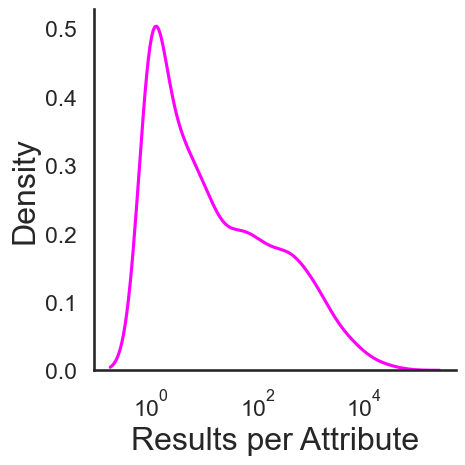

In [524]:
# sns.set_context("paper", rc={"font.size":8,"axes.titlesize":8,"axes.labelsize":5})   

display_df = df.groupby('property')['num_results'].min().reset_index()

sns.set_style("white")
sns.set_context("talk")

fig = sns.displot(data=display_df, x="num_results", kind='kde', log_scale=True, color='magenta')

# 'Distribution of number of results (classes and properties)'
plt.xlabel("Results per Attribute", fontsize=23)
plt.ylabel("Density", fontsize=23)
plt.tight_layout()
# plt.savefig('../../figs/results_distribution.png')
plt.show()

In [525]:
print(display_df.min())
print(display_df.max())

property       Analog
num_results         1
dtype: object
property       zoomFactor
num_results         44873
dtype: object


In [534]:
df.groupby('property')['num_results'].min().reset_index()['num_results'].value_counts()

num_results
1       417
2       126
3        82
4        71
6        41
       ... 
2571      1
370       1
1307      1
1207      1
276       1
Name: count, Length: 436, dtype: int64

In [200]:
df.head(2)

,property,num_results,prefix_name,score,type,uri,vocab_prefix,reused_by
0,id,2948,mv:id,0.555556,property,http://schema.mobivoc.org/id,mv,0
1,id,2948,biopax:id,0.534883,property,http://www.biopax.org/release/biopax-level3.ow...,biopax,1


In [201]:
df.groupby('vocab_prefix')['uri'].size().reset_index().sort_values('uri', ascending=False)

,vocab_prefix,uri
149,dicom,4360
323,lgdo,2214
134,dbpedia-owl,1833
281,ifc,1103
160,dogont,955
...,...,...
417,odpart,1
492,pnt,1
588,scip,1
592,scsv,1


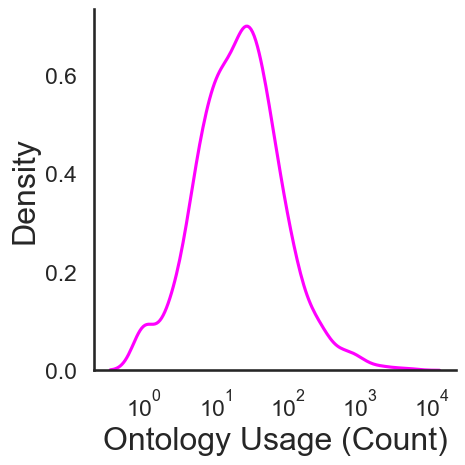

In [536]:
display_df = df.groupby('vocab_prefix').size().reset_index().sort_values(0, ascending=False)

sns.set_style("white")
sns.set_context("talk")

fig = sns.displot(data=display_df, x=0, kind='kde', log_scale=True, color='magenta')

# 'Distribution of number of results (classes and properties)'
plt.xlabel("Ontology Usage (Count)", fontsize=23)
plt.ylabel("Density", fontsize=23)
plt.tight_layout()
# plt.savefig('../../figs/uri_per_ontology_used.png')
plt.show()

In [540]:
display_df[0].median()

22.0

# Stats

In [81]:
len(sdm_attributes_df.property.unique())

4284

In [83]:
print(f'Unique Properties: {len(sdm_attributes_df.property.unique())}')
print(f'Unique Properties (threshold > 0.2): {len(df.property.unique())}')
print(f'Unique Vocabs: {len(df.vocab_prefix.unique())}')
print(f'Unique Vocab Classes / Properties: {len(df.prefix_name.unique())}')
print(f'Smart Data Models Attributes: {len(sdm_attributes_df)}')
print(f'Smart Data Models: {len(sdm_datamodels_df)}')

Unique Properties: 4284
Unique Properties (threshold > 0.2): 1615
Unique Vocabs: 763
Unique Vocab Classes / Properties: 33149
Smart Data Models Attributes: 21081
Smart Data Models: 67


In [207]:
df.head(2)

,property,num_results,prefix_name,score,type,uri,vocab_prefix,reused_by
0,id,2948,mv:id,0.555556,property,http://schema.mobivoc.org/id,mv,0
1,id,2948,biopax:id,0.534883,property,http://www.biopax.org/release/biopax-level3.ow...,biopax,1


In [212]:
results = {}
for p in df.property.unique():
    vals = df.loc[df['property'] == p, ['num_results', 'score', 'type']].values[0]
    results[p] = {
        'num_results' : vals[0],
        'score' : vals[1],
        'type' : vals[2]
    }

In [213]:
results = pd.DataFrame(results).T
results

,num_results,score,type
id,2948,0.555556,property
dateCreated,10,0.692835,property
dateModified,7,2.518802,property
source,2836,0.555556,property
name,2629,0.555556,property
...,...,...,...
hasTopConcept,1,1.0,property
codeList,48,0.816557,property
ageRange,9,1.813077,property
board,121,0.555556,class


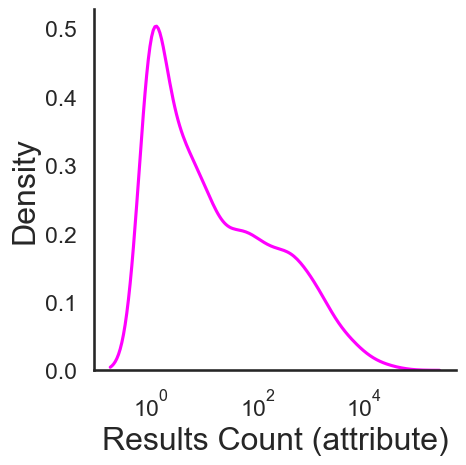

In [521]:
sns.set_style("white")
sns.set_context("talk")

sns.displot(data=results, x="num_results", kind='kde', log_scale=True, color='magenta')

#'Term count for SmartDataModel Properties'
plt.xlabel("Results Count (attribute)", fontsize=23)
plt.ylabel("Density", fontsize=23)
plt.tight_layout()
plt.savefig('../../figs/term_count.png')
plt.show()

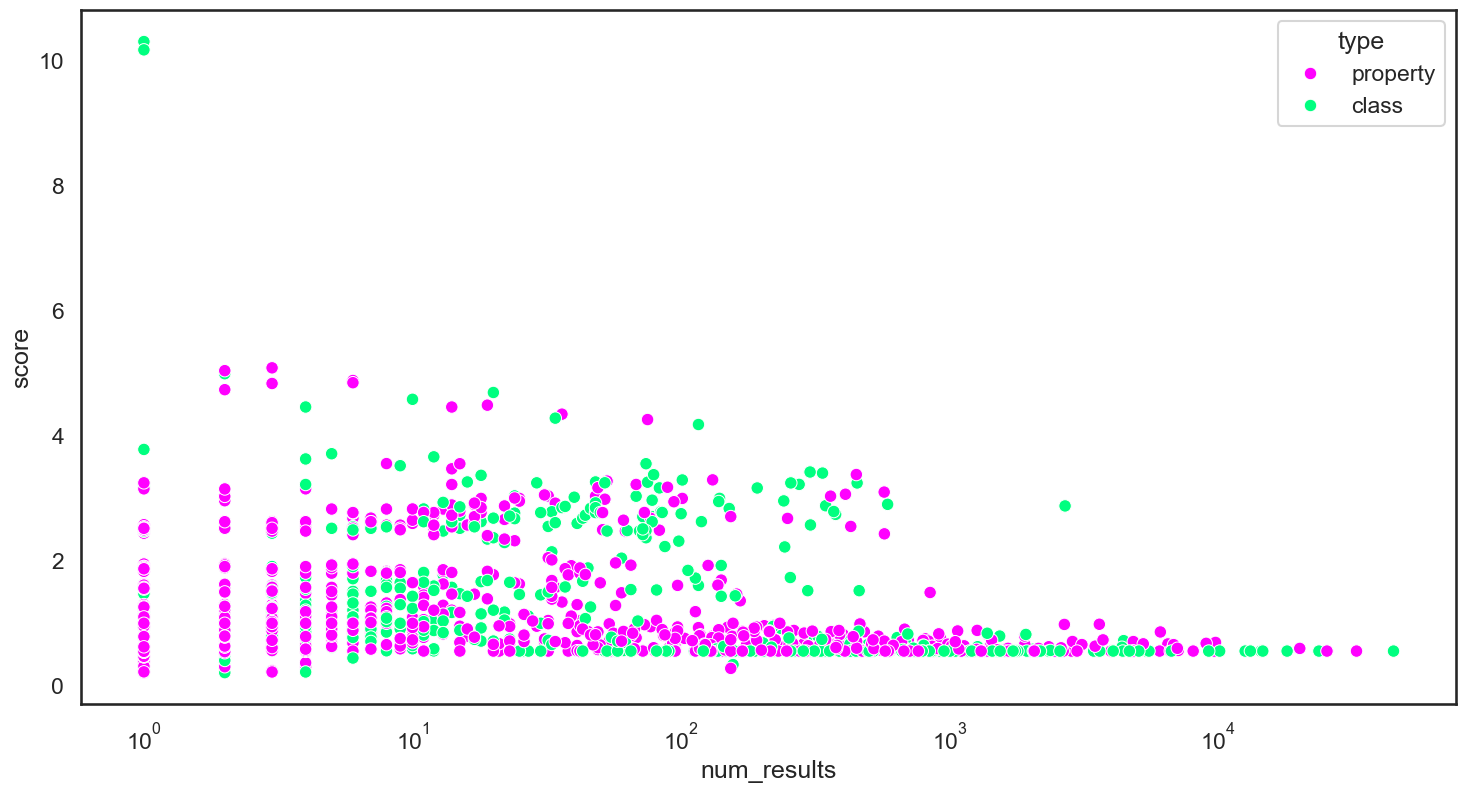

In [219]:
sns.set_style("white")
sns.set_context("talk")
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

sns.scatterplot(x="num_results", y="score",
                hue='type',
                # hue_order=clarity_ranking,
                # sizes=(1, 8), linewidth=0,
                data=results)

plt.xscale('log')
plt.tight_layout()
plt.savefig('../../figs/results_score_scatter.png')
plt.show()

# Vocabs Overlap

In [421]:
vovab_prefix_lookup = {v:idx for idx, v in enumerate(df.vocab_prefix.unique())}
node_vocab_lookup = {idx:v for idx, v in enumerate(df.vocab_prefix.unique())}

# Adj Matrix
adj_matrix_vocab = np.zeros([len(df.vocab_prefix.unique()), len(df.vocab_prefix.unique())])

In [402]:
for k in property_uri_mapper.keys():
    for c in list(combinations(sorted(property_uri_mapper[k]), 2)):
        adj_matrix_vocab[vovab_prefix_lookup[c[0]]][vovab_prefix_lookup[c[1]]] += 1

In [429]:
G = nx.from_numpy_array(adj_matrix_vocab)
attrs = {k:{'label': v} for k, v in node_vocab_lookup.items()}
nx.set_node_attributes(G, attrs)

In [428]:
nx.write_graphml(G, '../../graphs/vocabs.graphml')

## Heatmap

<Figure size 5000x2500 with 0 Axes>

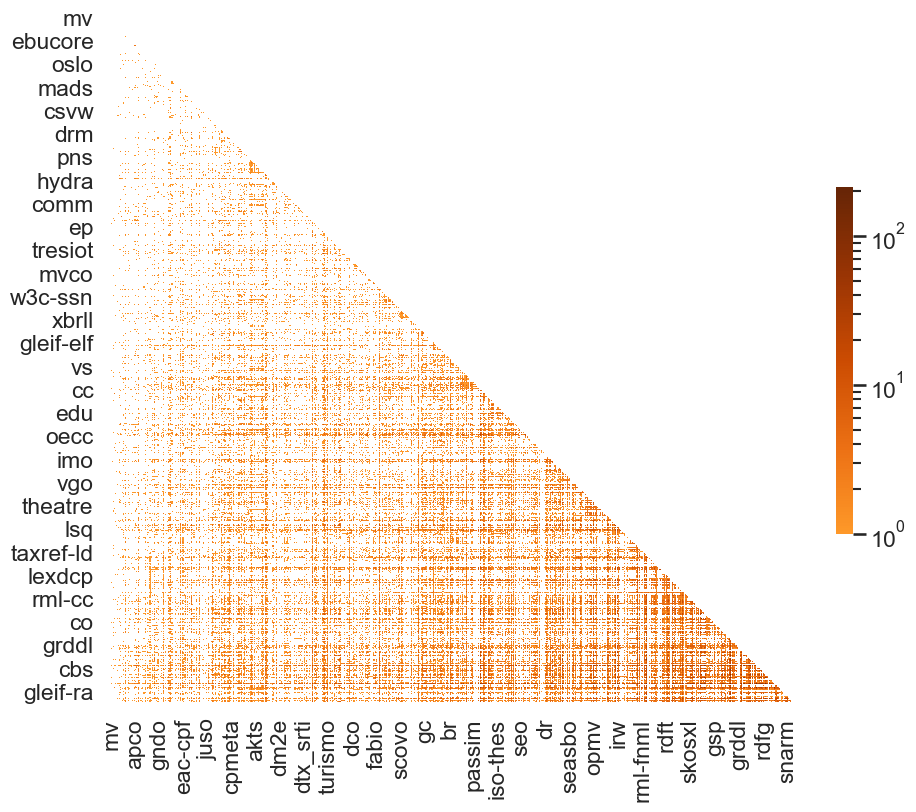

In [486]:
from matplotlib.colors import LogNorm, Normalize
fig = plt.figure(figsize=(50,25))
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(np.flip(adj_matrix_vocab), dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(np.flip(adj_matrix_vocab), mask=mask, cmap='YlOrBr', vmax=.3, center=0, norm=LogNorm(),
            square=True, cbar_kws={"shrink": .5})

# for ax in plt.axes.flat:
x_labels = ax.get_xticklabels() # get x labels
y_labels = ax.get_yticklabels() # get x labels
x_labels = [node_vocab_lookup[int(x.get_text())] for x in x_labels]
y_labels = [node_vocab_lookup[int(x.get_text())] for x in y_labels]
ax.set_xticklabels(x_labels, rotation=90) # set new labels
ax.set_yticklabels(y_labels) # set new labels
plt.savefig('../../figs/vocab_heatmap.png')
plt.show()